In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


In [ ]:
milk = pd.read_csv('milknew.csv',index_col=[0])
#milk.head()
print(milk.shape)
milk.describe()

(1059, 7)


,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
milk['Grade'].replace({'high':2,'medium':1,'low':0},inplace=True) 

In [ ]:
milk.head()

,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,,,,,,,
6.6,35,1,0,1,0,254,2
6.6,36,0,1,0,1,253,2
8.5,70,1,1,1,1,246,0
9.5,34,1,1,0,1,255,0
6.6,37,0,0,0,0,255,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


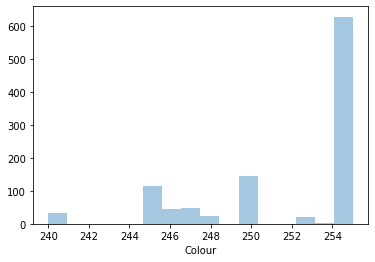

In [ ]:
sns.distplot(milk['Colour'],kde=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


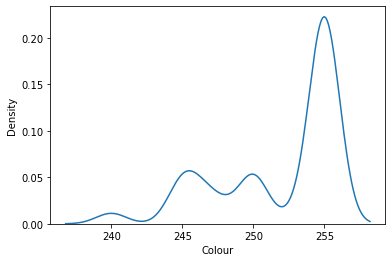

In [ ]:
sns.distplot(milk['Colour'],hist=False)

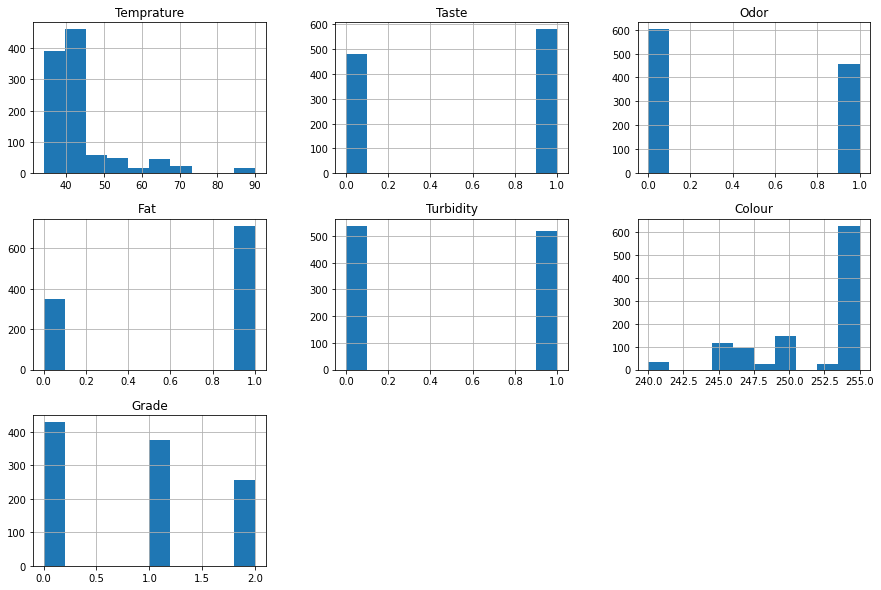

In [ ]:
milk.hist(figsize =(15,10))
plt.show()

In [ ]:
sns.pairplot(milk,height=5)

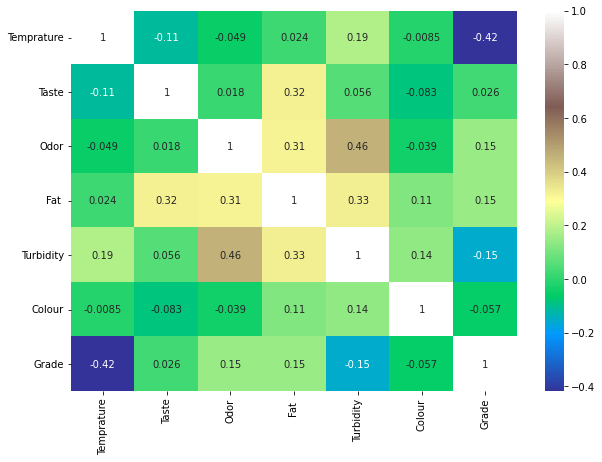

In [ ]:
sns.heatmap(milk.corr(),annot = True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

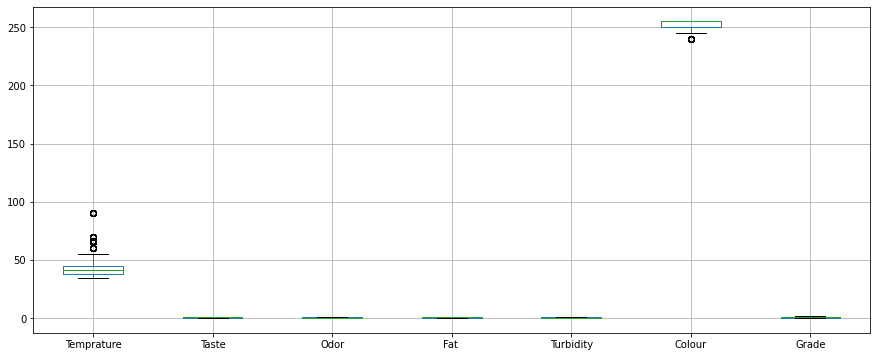

In [ ]:
milk.boxplot(figsize = (15,6))
plt.show()

On remarque que la Colour, pH et la Temperature admette des aberrantes. 
 



**Toutes les caractéristiques sont importantes pour notre prédiction, donc nous ne laisserons aucune caractéristique dans notre base de données.**



In [ ]:
milk['Grade'].value_counts()

0    429
1    374
2    256
Name: Grade, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


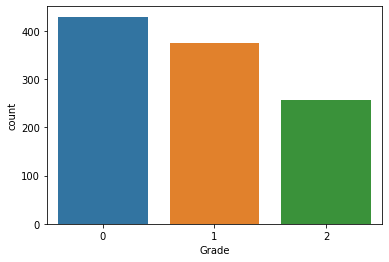

In [ ]:
sns.countplot(milk['Grade'])
plt.show()

In [ ]:
X = milk.drop('Grade',axis = 1) # Input data
print(X)
Y = milk['Grade']
print(Y)

     Temprature  Taste  Odor  Fat   Turbidity  Colour
pH                                                   
6.6          35      1     0     1          0     254
6.6          36      0     1     0          1     253
8.5          70      1     1     1          1     246
9.5          34      1     1     0          1     255
6.6          37      0     0     0          0     255
..          ...    ...   ...   ...        ...     ...
6.7          45      1     1     0          0     247
6.7          38      1     0     1          0     255
3.0          40      1     1     1          1     255
6.8          43      1     0     1          0     250
8.6          55      0     1     1          1     255

[1059 rows x 6 columns]
pH
6.6    2
6.6    2
8.5    0
9.5    0
6.6    1
      ..
6.7    1
6.7    2
3.0    0
6.8    2
8.6    0
Name: Grade, Length: 1059, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=0)
print("trainSet X : ",X_train.shape)
print("testSet X : ",X_test.shape)
print("trainSet Y : ",Y_train.shape)
print("testSet Y : ",Y_test.shape)

trainSet X :  (794, 6)
testSet X :  (265, 6)
trainSet Y :  (794,)
testSet Y :  (265,)


# KNN

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
Acc_Knn=cross_val_score(KNeighborsClassifier(),X,Y,cv=4,scoring='accuracy')
print(Acc_Knn)
from statistics import mean
moy=mean(Acc_Knn)
print(moy)

[0.90943396 0.89056604 0.88679245 0.86363636]
0.8876072041166381


In [ ]:
# valeur possible 
from sklearn.model_selection import GridSearchCV
import numpy as np
Param_Grid={'n_neighbors':np.arange(1,100),'metric':['minkowski','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),Param_Grid,cv=4)
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)

0.8998856489422528
{'metric': 'minkowski', 'n_neighbors': 7}


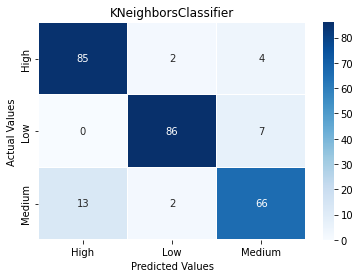

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        91
           1       0.96      0.92      0.94        93
           2       0.86      0.81      0.84        81

    accuracy                           0.89       265
   macro avg       0.89      0.89      0.89       265
weighted avg       0.90      0.89      0.89       265



In [ ]:
y_pred = grid.predict(X_test)
cm = sklearn.metrics.confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("KNeighborsClassifier")
plt.show()

print(sklearn.metrics.classification_report(Y_test,y_pred, zero_division=1))

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn import tree
import numpy as np
param_grid = { 'criterion':['gini','entropy']}
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=4)
dtree_gscv.fit(X,Y)
print(dtree_gscv.best_score_)
print(dtree_gscv.best_params_)

0.9065072898799313
{'criterion': 'gini'}


Train score :  0.9231738035264484


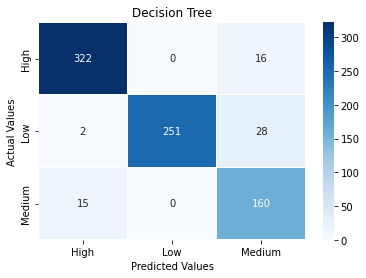

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Train score : ',model.score(X_train,Y_train))
CM_train=confusion_matrix(Y_train,model.predict(X_train))

ax = sns.heatmap(CM_train,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Decision Tree")
plt.show()

Test score :  0.8830188679245283


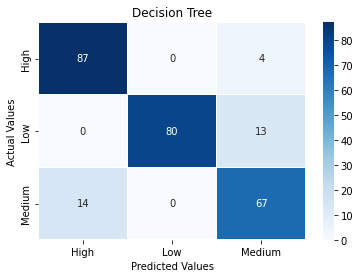

In [ ]:
print('Test score : ',model.score(X_test,Y_test))
CM_test=confusion_matrix(Y_test,model.predict(X_test))
ax = sns.heatmap(CM_test,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Decision Tree")
plt.show()

[Text(0.49744897959183676, 0.9444444444444444, 'X[0] <= 47.5\ngini = 0.645\nsamples = 794\nvalue = [338, 281, 175]'),
 Text(0.45663265306122447, 0.8333333333333334, 'X[4] <= 0.5\ngini = 0.647\nsamples = 629\nvalue = [173, 281, 175]'),
 Text(0.22448979591836735, 0.7222222222222222, 'X[3] <= 0.5\ngini = 0.45\nsamples = 349\nvalue = [32, 247, 70]'),
 Text(0.08163265306122448, 0.6111111111111112, 'X[0] <= 39.0\ngini = 0.179\nsamples = 161\nvalue = [16, 145, 0]'),
 Text(0.04081632653061224, 0.5, 'gini = 0.0\nsamples = 98\nvalue = [0, 98, 0]'),
 Text(0.12244897959183673, 0.5, 'X[0] <= 40.5\ngini = 0.379\nsamples = 63\nvalue = [16, 47, 0]'),
 Text(0.08163265306122448, 0.3888888888888889, 'X[5] <= 252.5\ngini = 0.423\nsamples = 23\nvalue = [16, 7, 0]'),
 Text(0.04081632653061224, 0.2777777777777778, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.12244897959183673, 0.2777777777777778, 'X[1] <= 0.5\ngini = 0.266\nsamples = 19\nvalue = [16, 3, 0]'),
 Text(0.08163265306122448, 0.1666666666

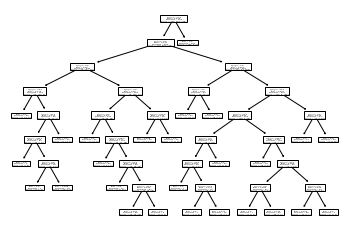

In [ ]:
from sklearn import tree
model.fit(X_train,Y_train)
tree.plot_tree(model)

In [ ]:
print('profondeur = ', model.get_depth())
print('nomber des feuille = ',model.get_n_leaves())

profondeur =  8
nomber des feuille =  26


In [ ]:
from sklearn.tree import export_text
r = export_text(model)
print(r)

|--- feature_0 <= 47.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 39.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  39.00
|   |   |   |   |--- feature_0 <= 40.50
|   |   |   |   |   |--- feature_5 <= 252.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  252.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  40.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |--- feature_5 <= 248.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  248.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- feature_0 <= 43.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  43.00
|   |   |   |   |   |--- class: 2
|   |--- 

# RF

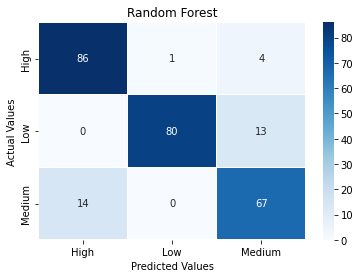

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        91
           1       0.99      0.86      0.92        93
           2       0.80      0.83      0.81        81

    accuracy                           0.88       265
   macro avg       0.88      0.88      0.88       265
weighted avg       0.89      0.88      0.88       265



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
cm = sklearn.metrics.confusion_matrix(Y_test, y_pred)

ax = sns.heatmap(cm,annot=True,fmt="",cmap='Blues',linewidths=0.30)
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_xticklabels(["High","Low","Medium"])
ax.set_yticklabels(["High","Low","Medium"], rotation = 90, va = "center")
plt.title("Random Forest")
plt.show()

print(sklearn.metrics.classification_report(Y_test, y_pred))
